# convert .raw to cbf file for beamline 1-5

#!/usr/bin/env python3
 -*- coding: utf-8 -*-
"""
Created on Fri Apr 21 19:29:58 2023

@author: akmaurya
"""


CBF image saved in: 


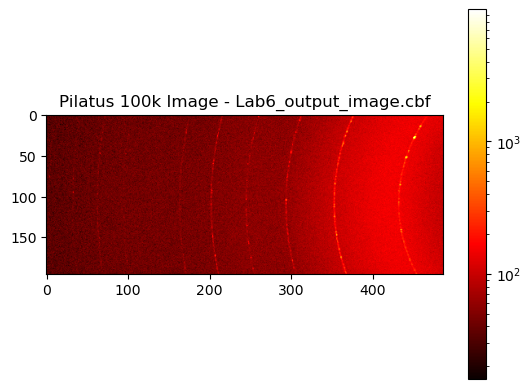

In [1]:
import fabio
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import os

# Define the file path of the raw file
file_path = r'X:\bl1-5\Anjani\Methanolysis\Dec2023\Standards\WAXS\b_tassone_Lab6_rock1mm_run75_loop0__scan1_0000.raw'

# Read the raw file and reshape the data
data = np.fromfile(file_path, dtype=np.int32).reshape( 195,487)

# Convert the data to Pilatus file format using FabIO
pilatus_image = fabio.edfimage.EdfImage(data, header={'ByteOrder': 'LowByteFirst',
                                                      'DataType': 'UnsignedInteger',
                                                      'Dim_1': 195,
                                                      'Dim_2': 487,
                                                      'Image': 'image'})

# Define output file name
output_filename = 'Lab6_output_image.cbf'
output_folder = os.path.dirname(output_filename)
output_path = os.path.join(output_folder, output_filename)

# Save the Pilatus file
pilatus_image.write(output_path, force_type=None)

# Print the folder where the CBF image is saved
print(f"CBF image saved in: {output_folder}")

# Customize title
plot_title = f'Pilatus 100k Image - {output_filename}'

# Display the image using matplotlib with hot colormap and intensity in log-log scale
plt.imshow(data, cmap='hot', norm=LogNorm())
plt.title(plot_title)
plt.colorbar()
plt.show()
